In [10]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
#uploading the data set
df=pd.read_csv('C:/Users/Sachin Kamath/Downloads/oil_spill.csv')

In [5]:
#Basic Data Summary

# Display the shape of the dataset
print("Shape of the dataset:", df.shape)

# Display the column names
print("Columns:", df.columns)

# Display the first few rows of the dataset
print("Head:\n", df.head())

# Display the summary statistics of the dataset
print("Summary Statistics:\n", df.describe())

Shape of the dataset: (937, 50)
Columns: Index(['f_1', 'f_2', 'f_3', 'f_4', 'f_5', 'f_6', 'f_7', 'f_8', 'f_9', 'f_10',
       'f_11', 'f_12', 'f_13', 'f_14', 'f_15', 'f_16', 'f_17', 'f_18', 'f_19',
       'f_20', 'f_21', 'f_22', 'f_23', 'f_24', 'f_25', 'f_26', 'f_27', 'f_28',
       'f_29', 'f_30', 'f_31', 'f_32', 'f_33', 'f_34', 'f_35', 'f_36', 'f_37',
       'f_38', 'f_39', 'f_40', 'f_41', 'f_42', 'f_43', 'f_44', 'f_45', 'f_46',
       'f_47', 'f_48', 'f_49', 'target'],
      dtype='object')
Head:
    f_1    f_2      f_3     f_4  f_5       f_6    f_7   f_8      f_9  f_10  \
0    1   2558  1506.09  456.63   90   6395000  40.88  7.89  29780.0  0.19   
1    2  22325    79.11  841.03  180  55812500  51.11  1.21  61900.0  0.02   
2    3    115  1449.85  608.43   88    287500  40.42  7.34   3340.0  0.18   
3    4   1201  1562.53  295.65   66   3002500  42.40  7.97  18030.0  0.19   
4    5    312   950.27  440.86   37    780000  41.43  7.03   3350.0  0.17   

   ...     f_41      f_42     f

In [6]:
# Null Value Analysis 

# Count the number of missing values in each column
missing_values = df.isnull().sum()

# Sort columns based on the number of missing values
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

# Calculate the percentage of missing values
missing_percentage = (missing_values / len(df)) * 100

# Create a DataFrame to display missing value information
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing Percentage': missing_percentage
})

# Display the missing value information
print("Missing Values:\n", missing_data)

Missing Values:
 Empty DataFrame
Columns: [Missing Values, Missing Percentage]
Index: []


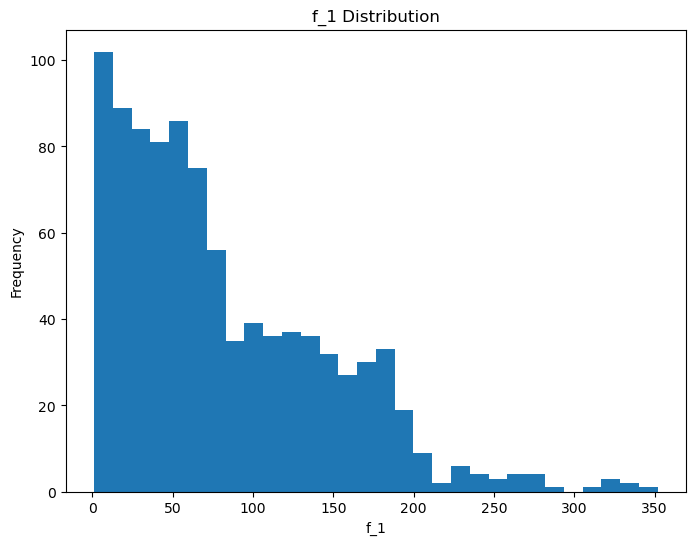

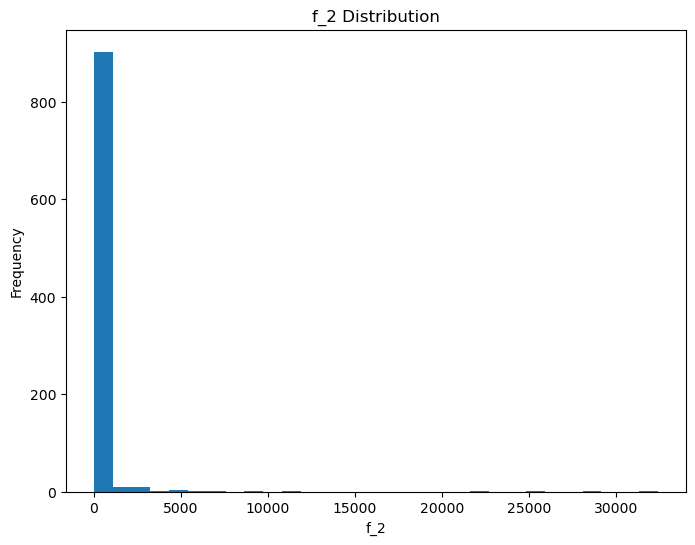

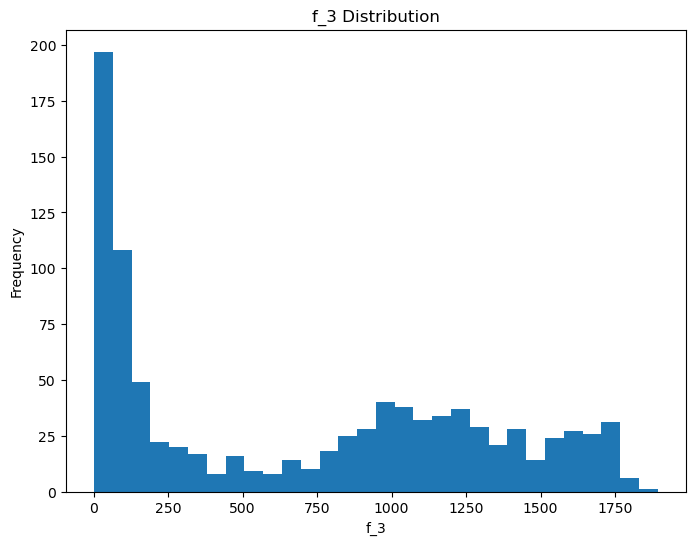

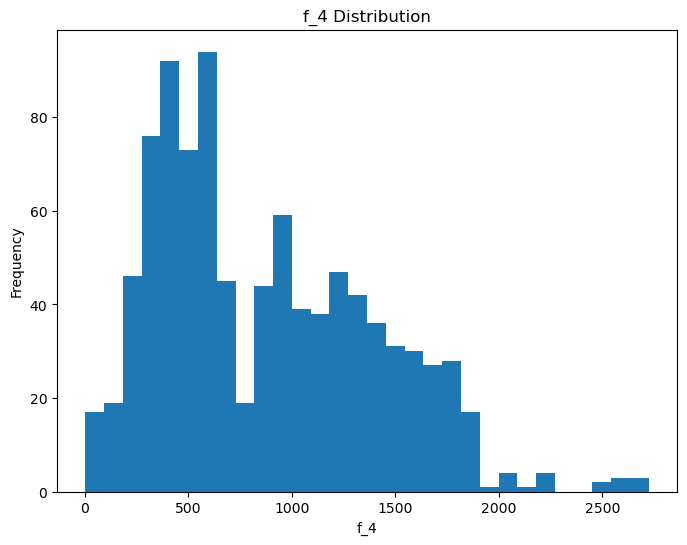

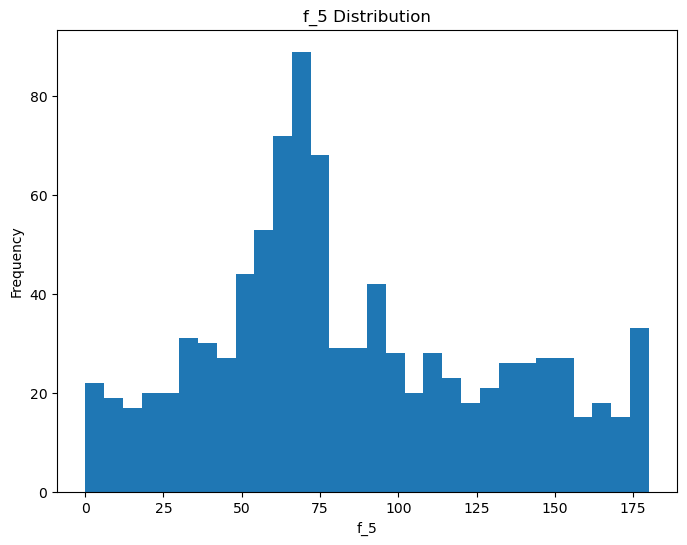

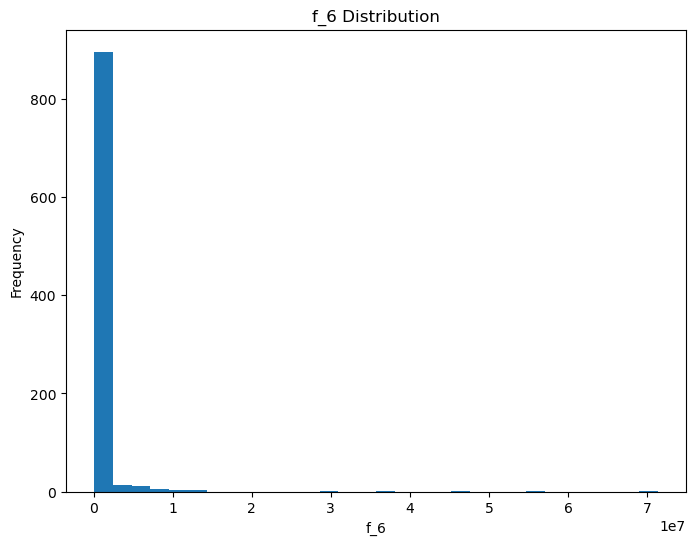

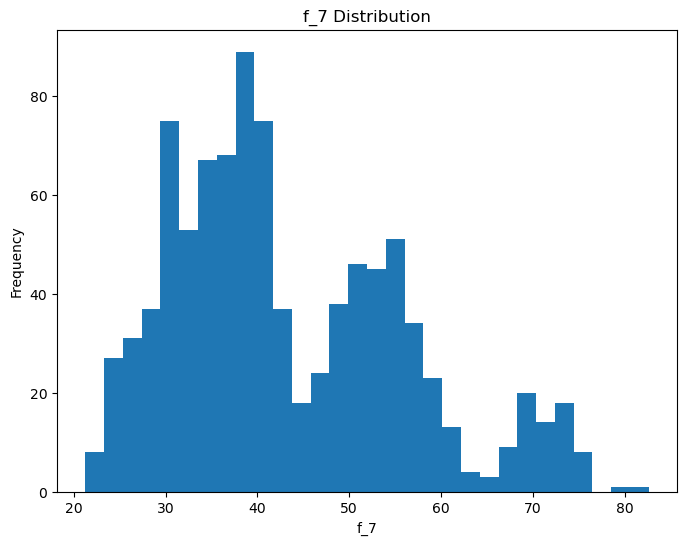

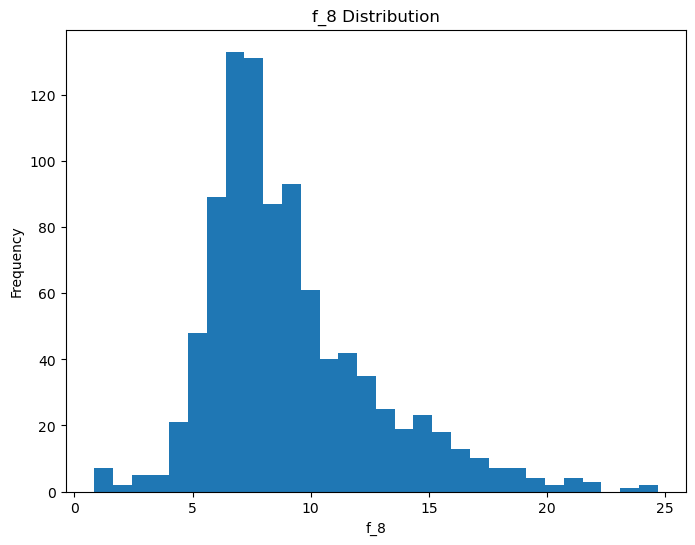

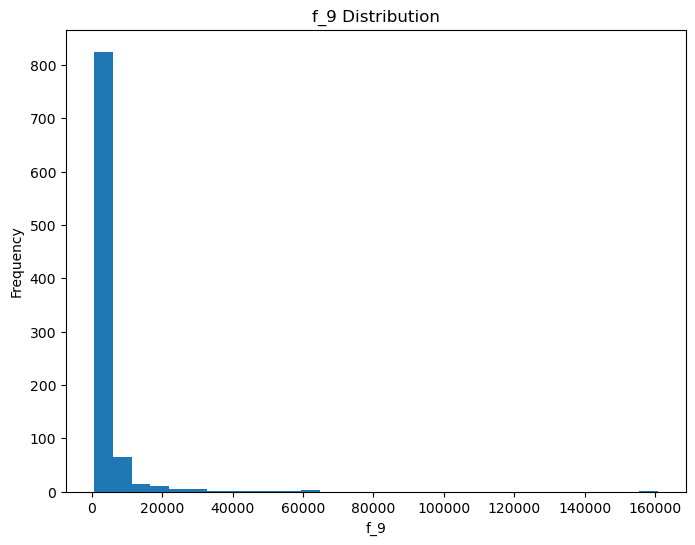

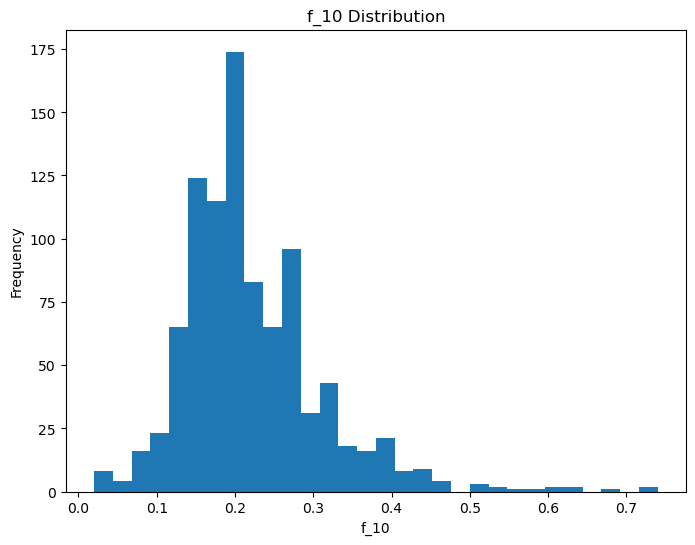

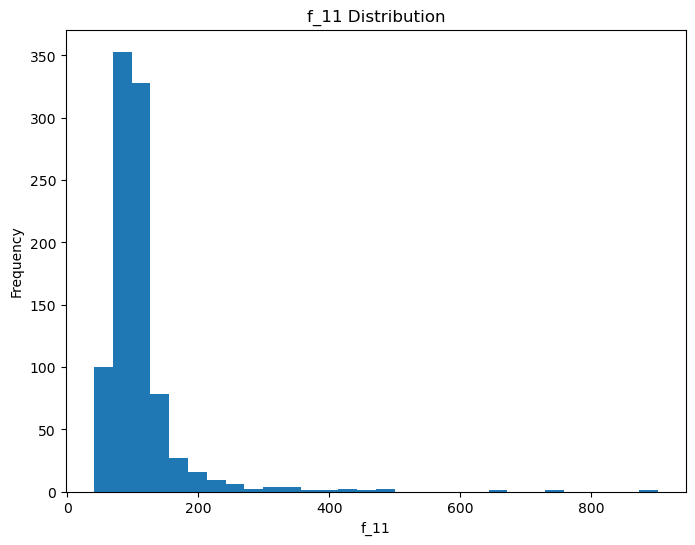

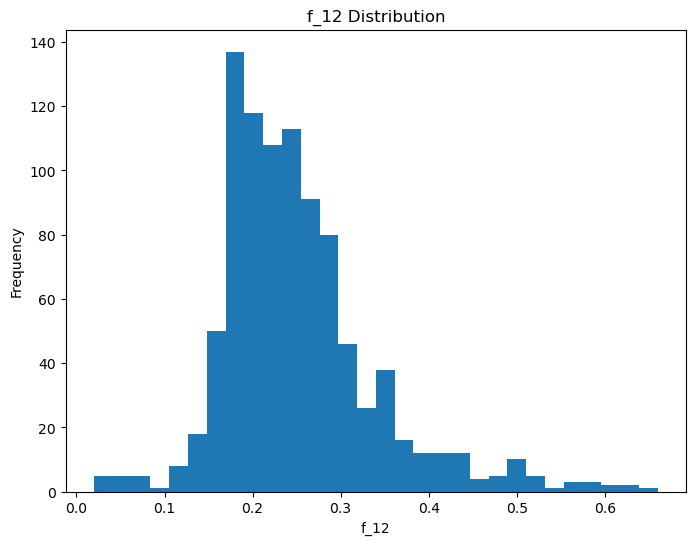

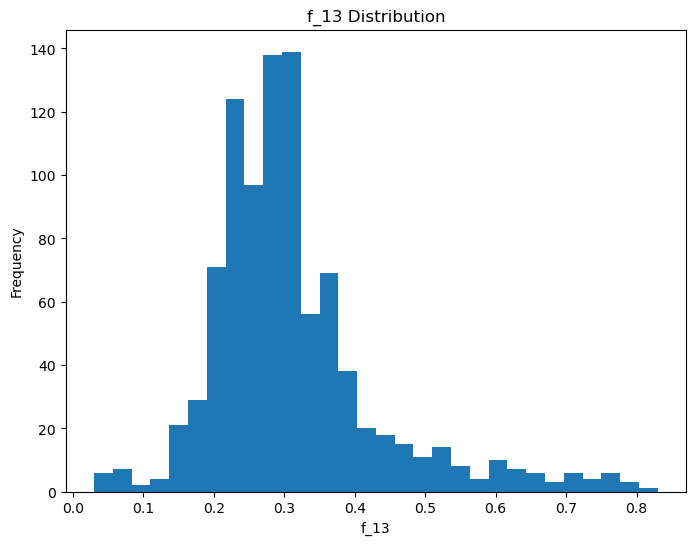

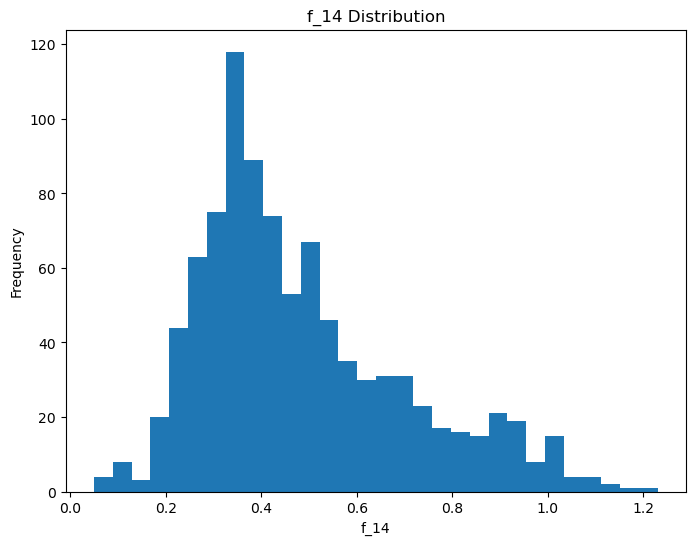

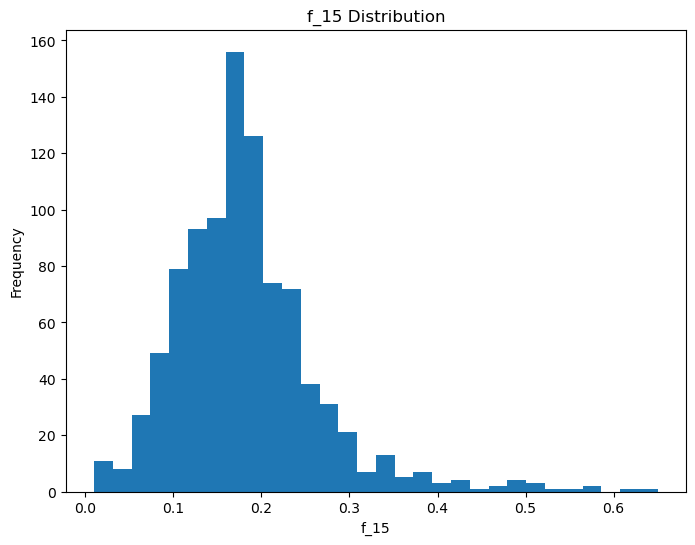

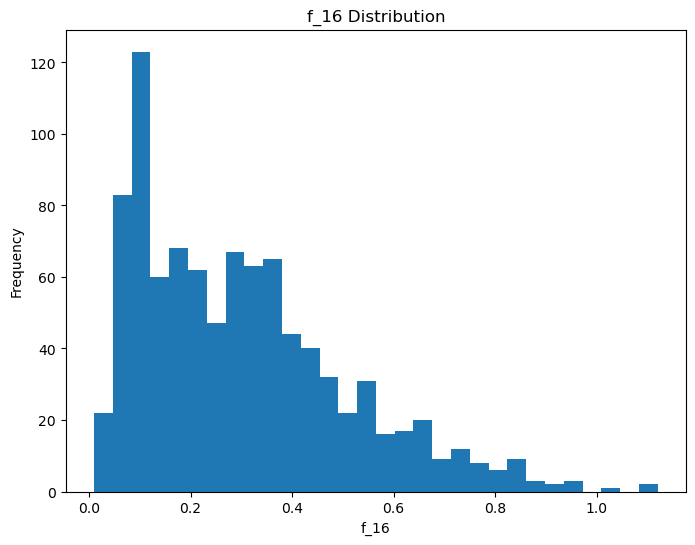

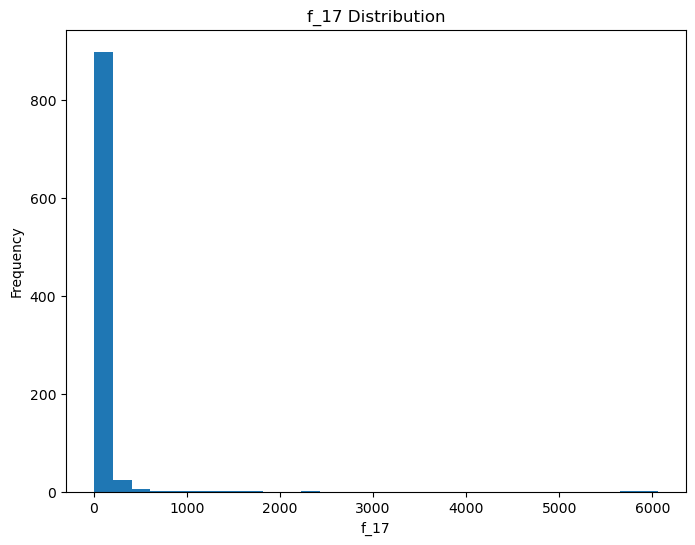

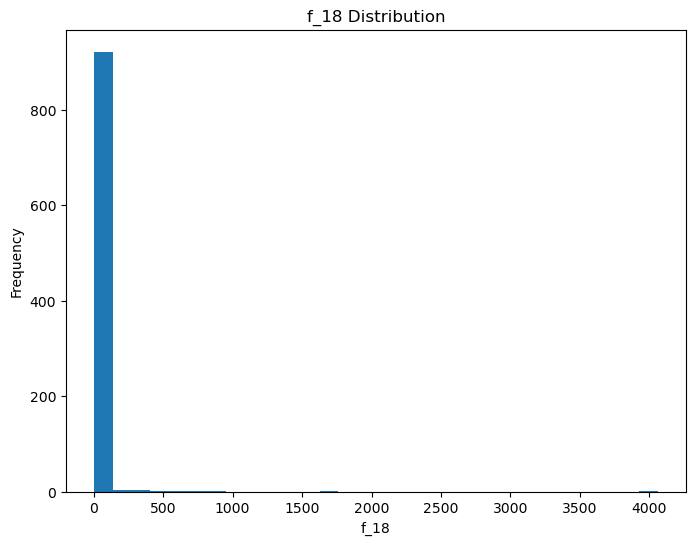

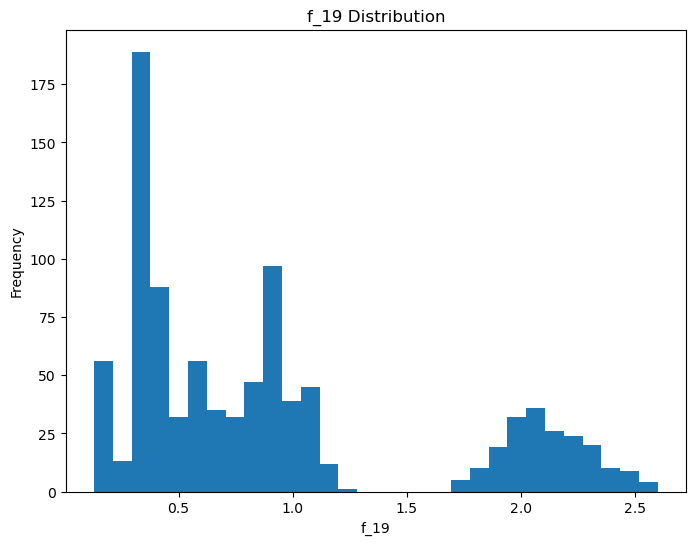

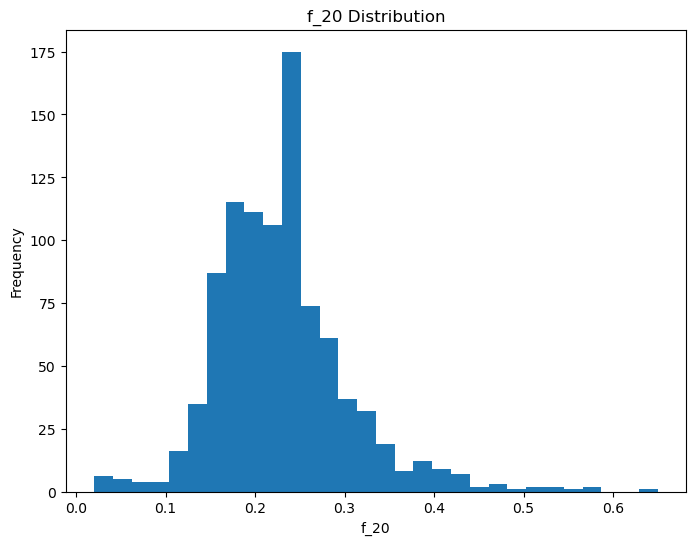

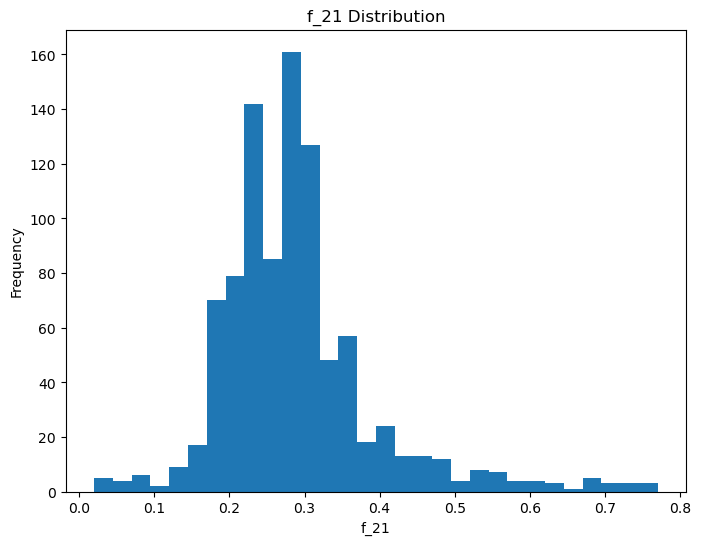

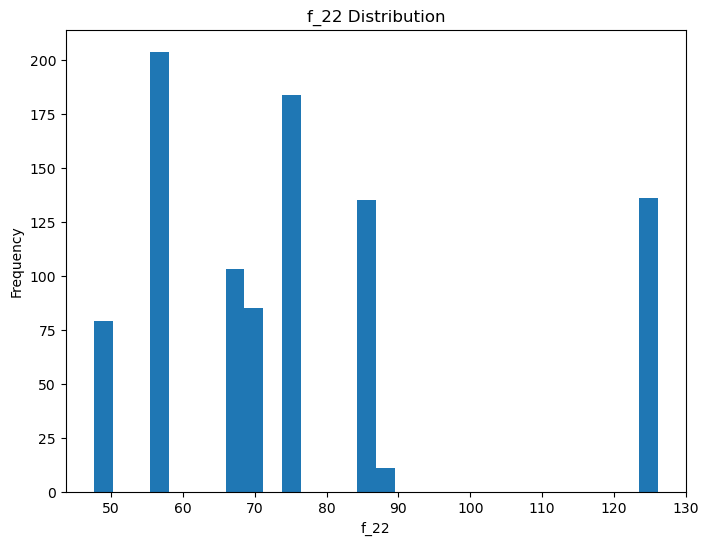

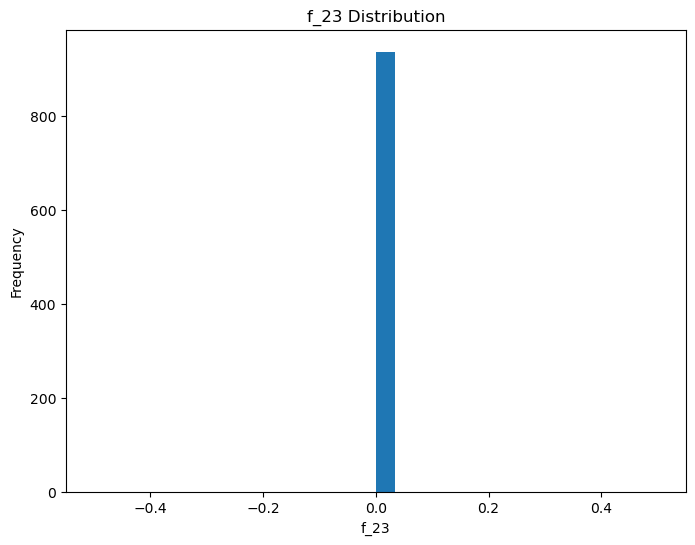

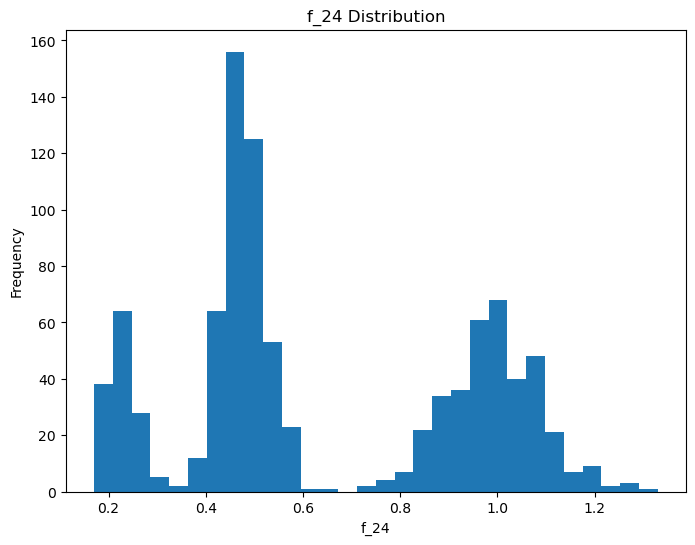

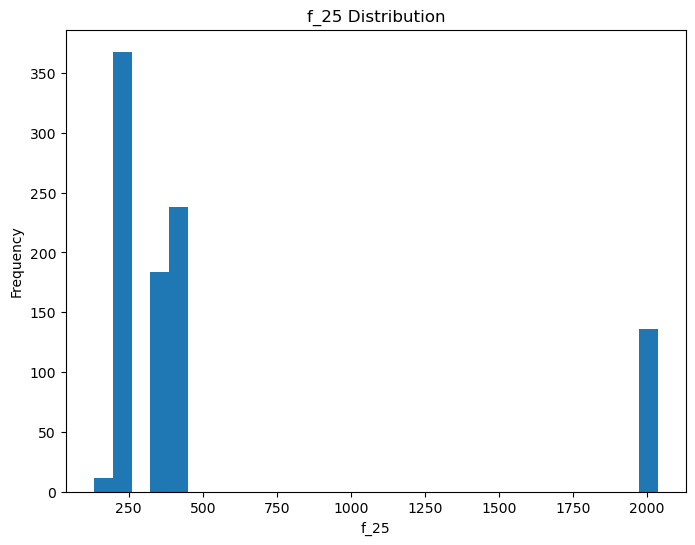

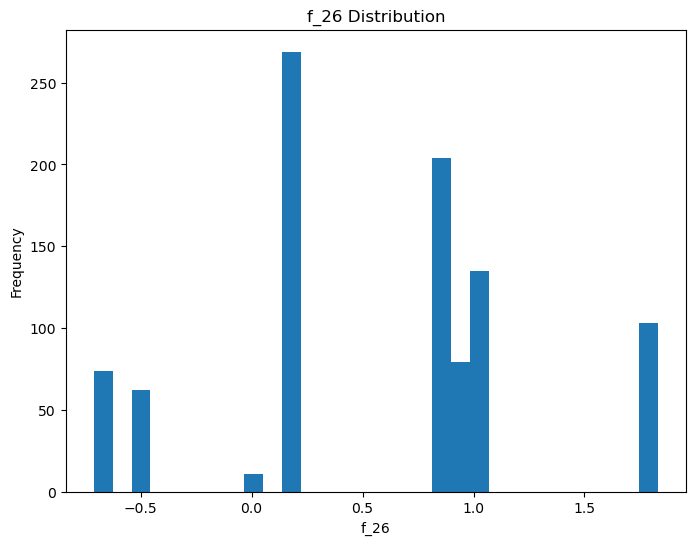

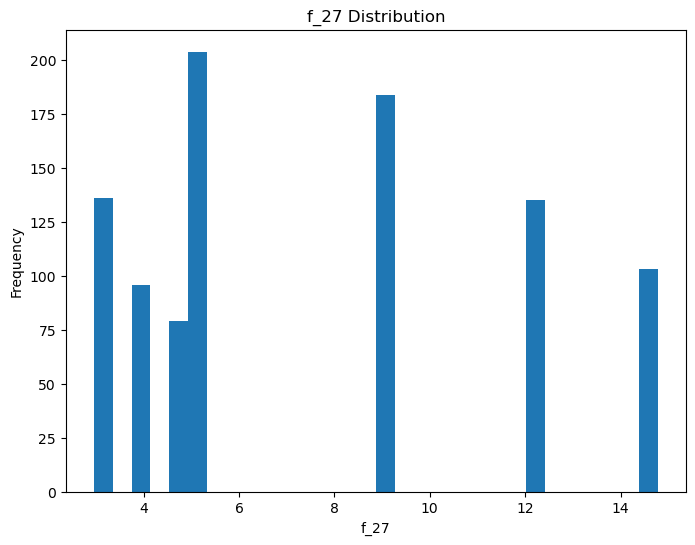

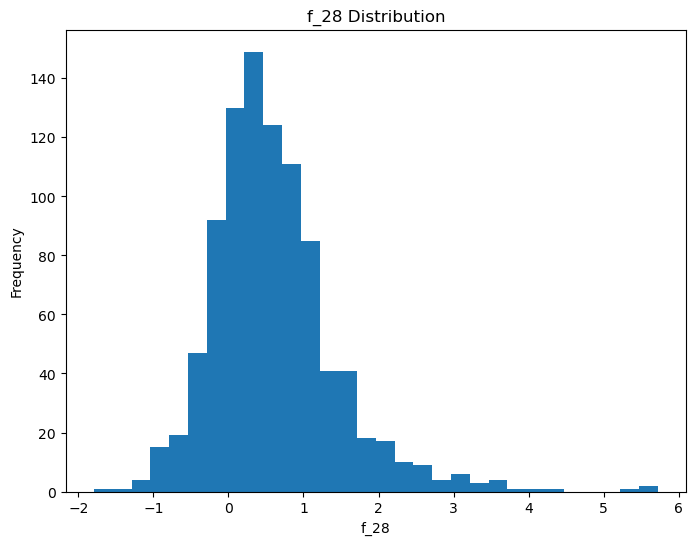

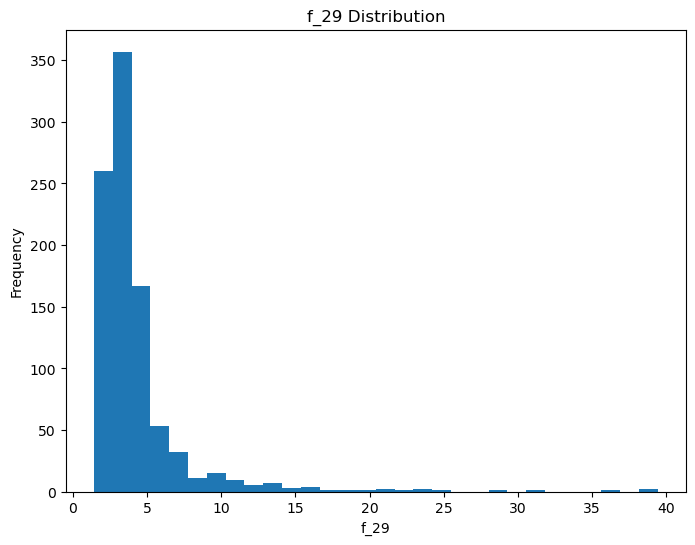

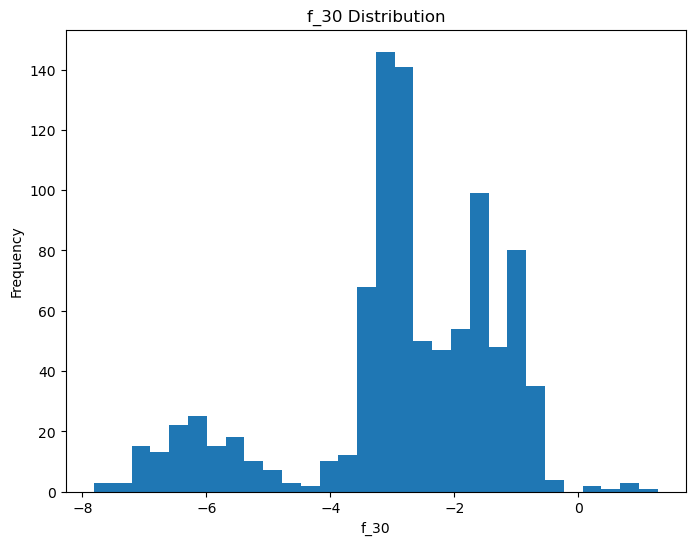

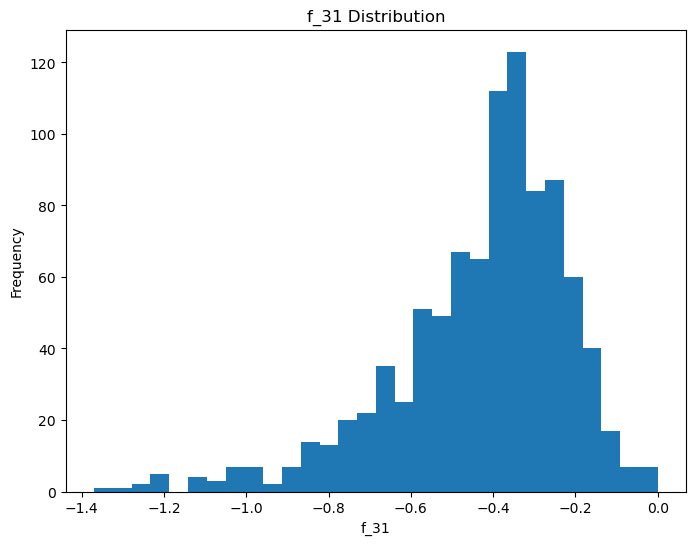

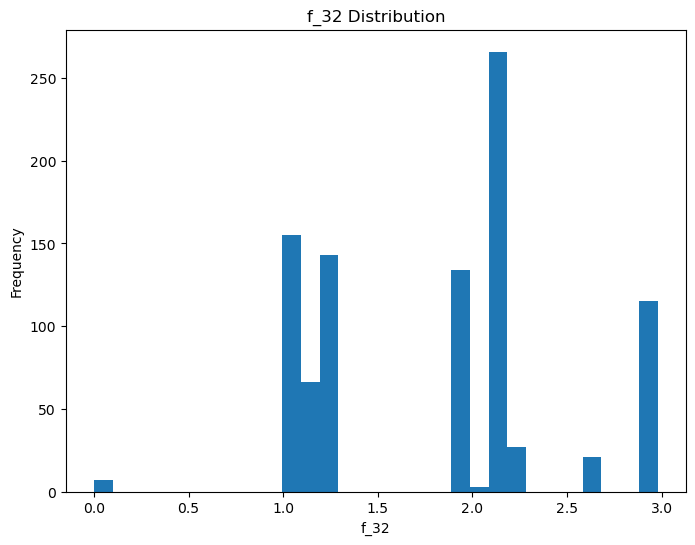

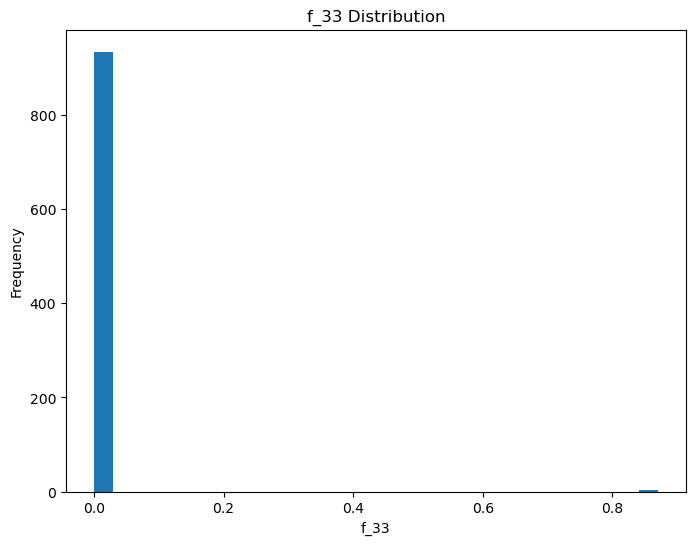

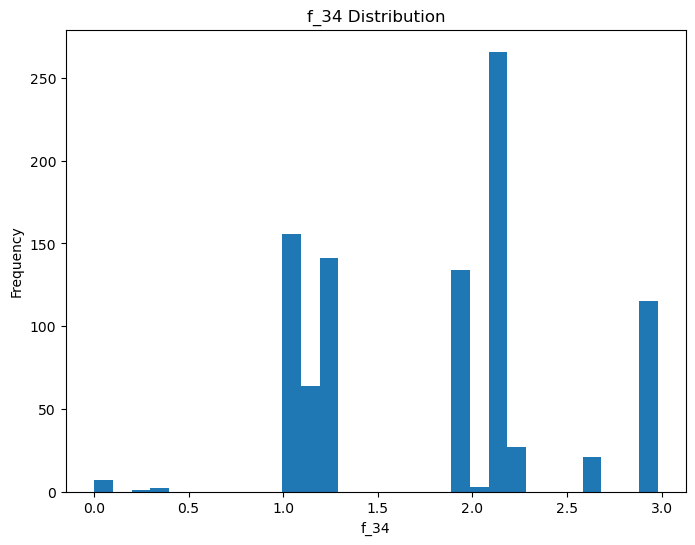

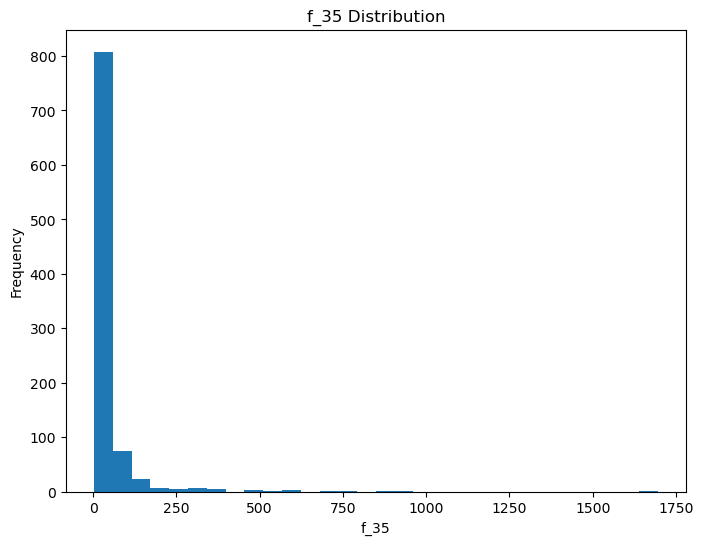

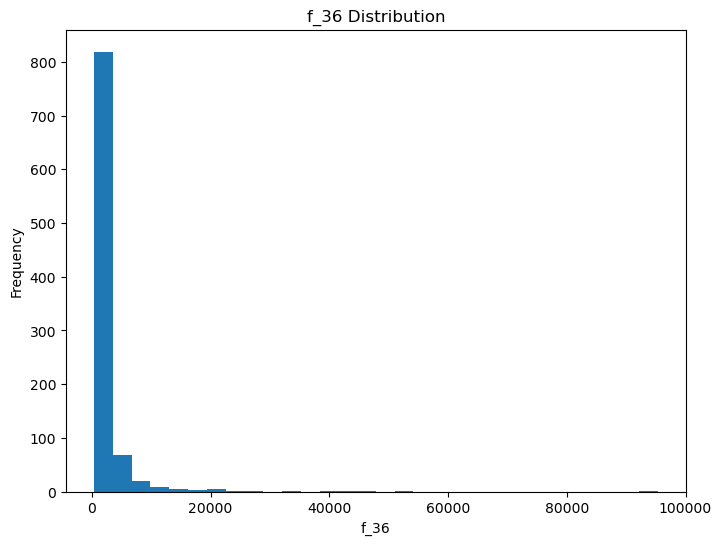

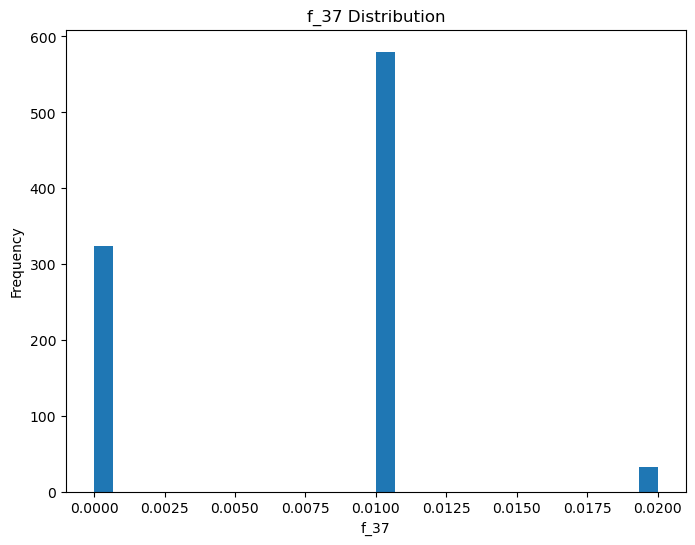

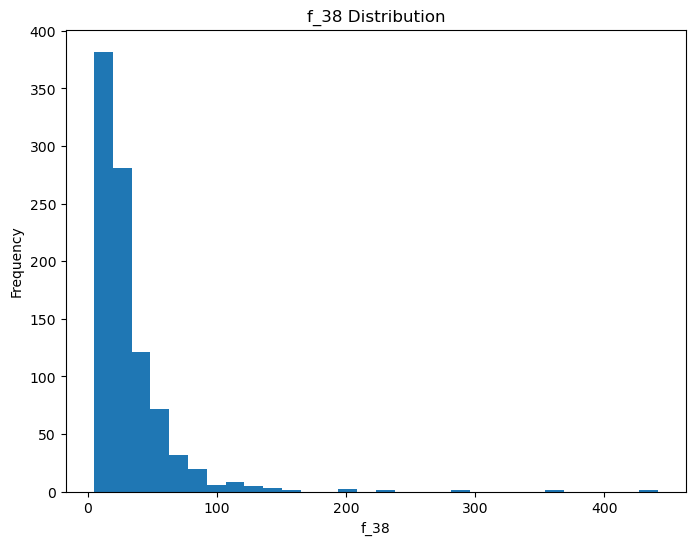

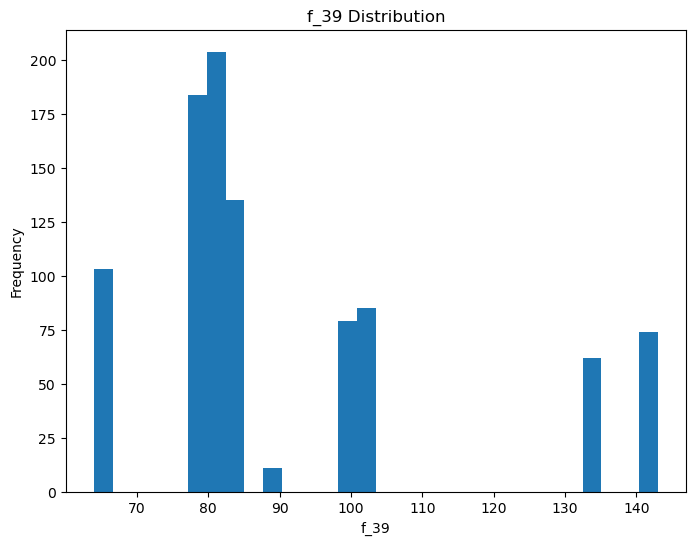

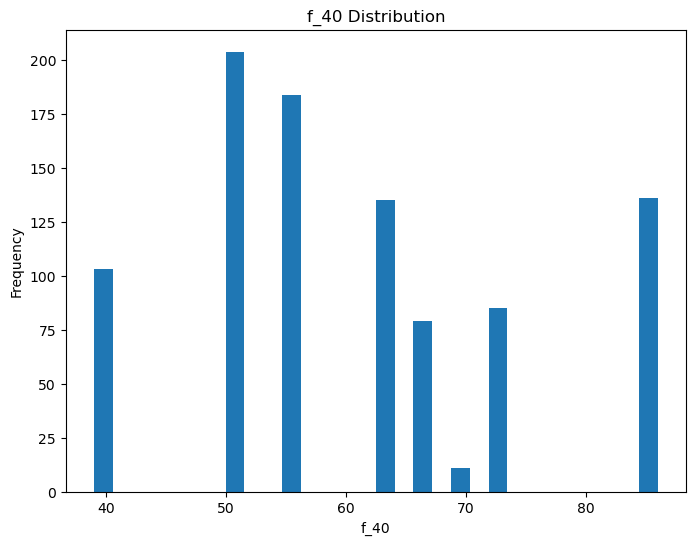

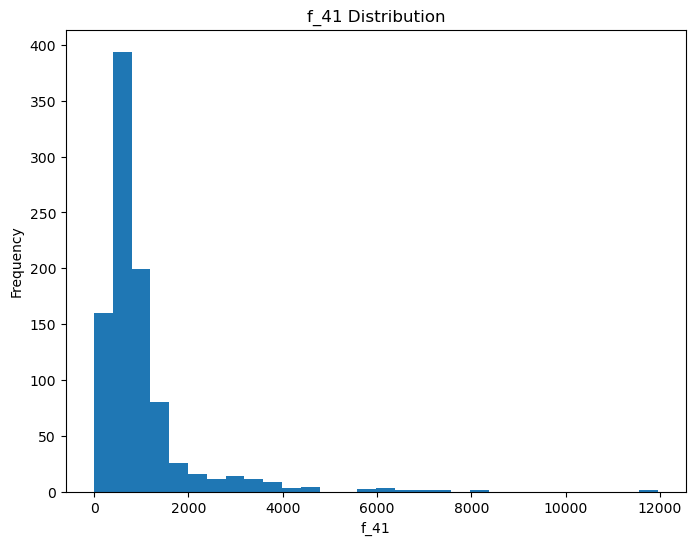

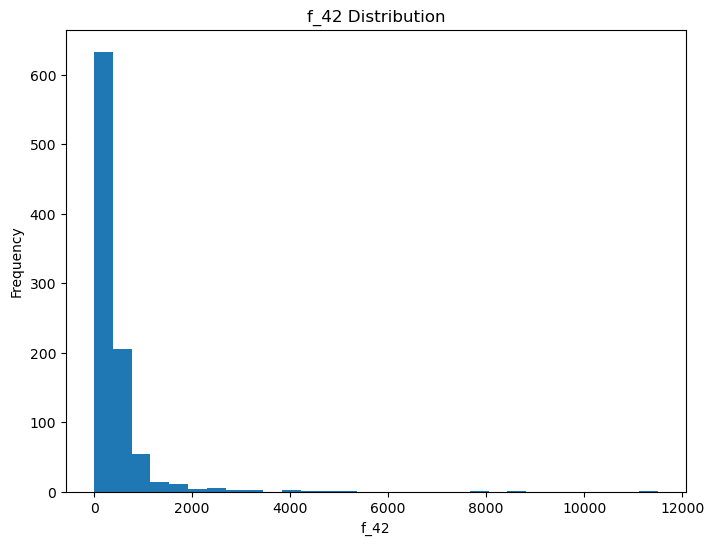

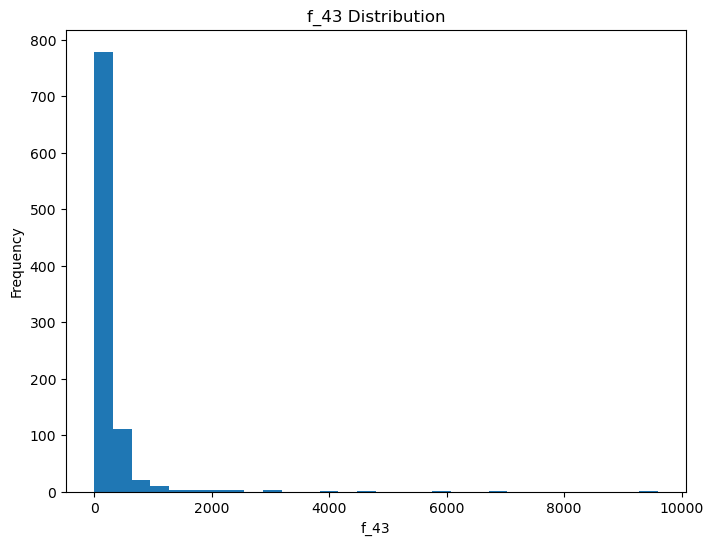

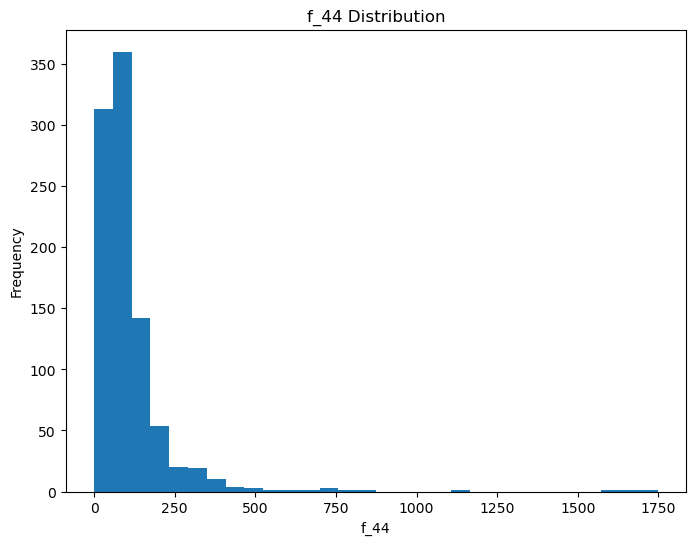

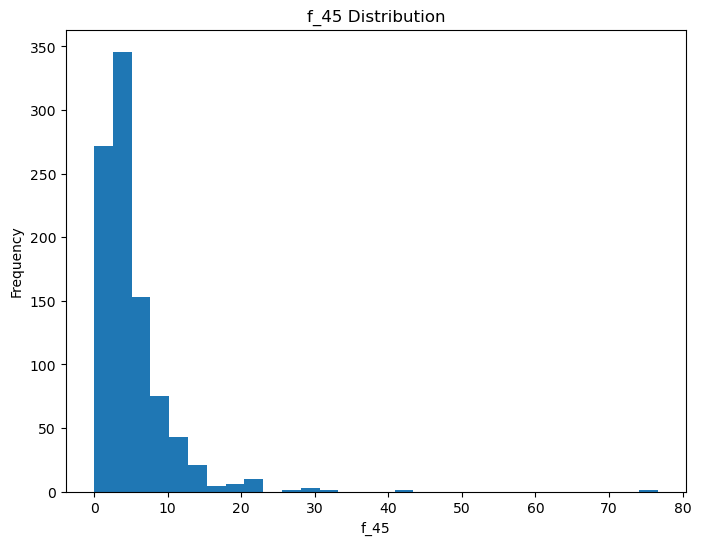

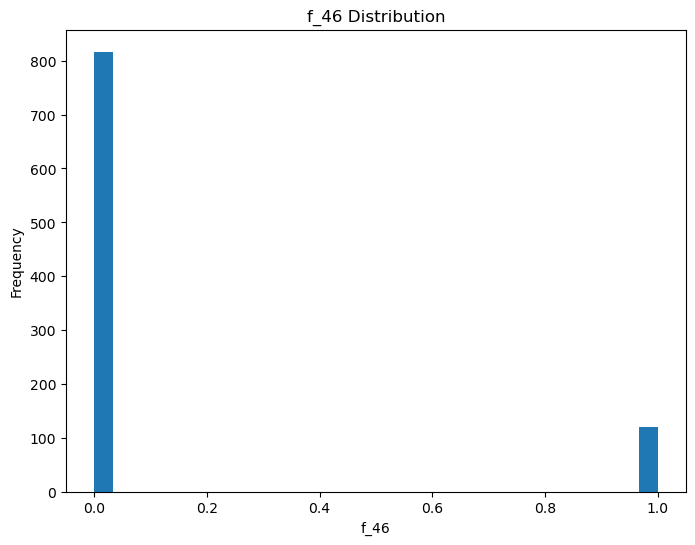

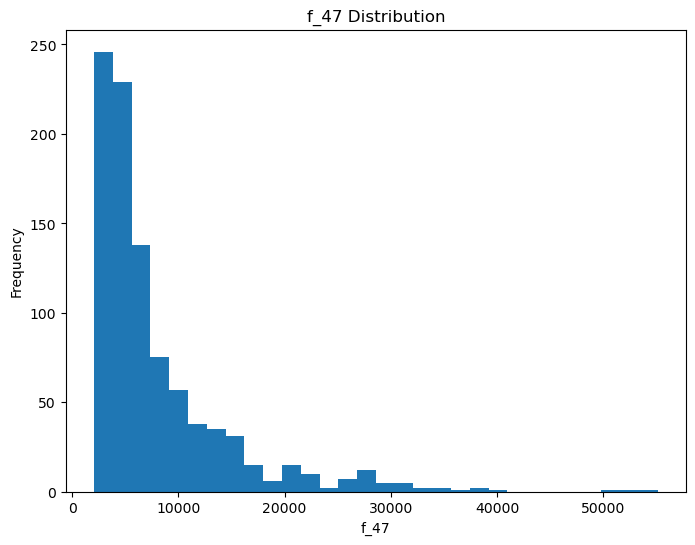

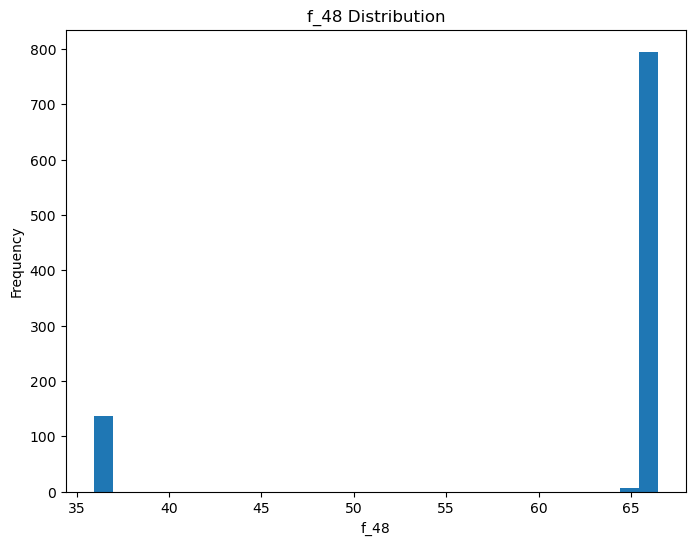

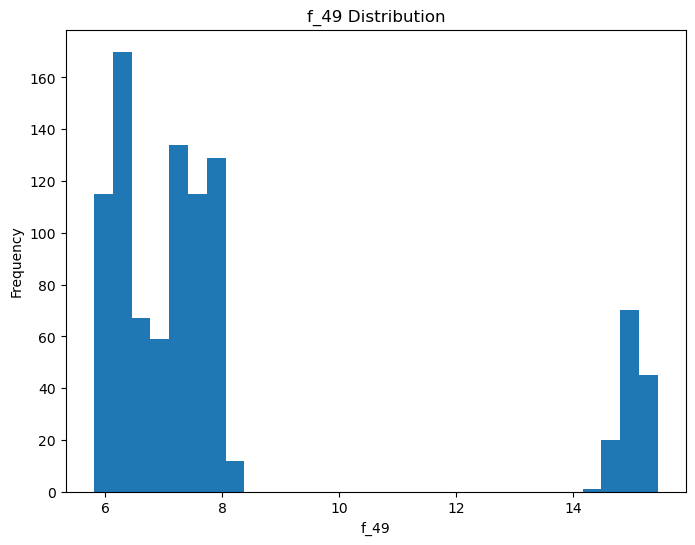

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('C:/Users/Sachin Kamath/Downloads/oil_spill.csv')

# Iterate over each column and create a plot
for column in df.columns:
    # Skip plotting the target variable if it is included in the dataset
    if column == 'target':
        continue
    
    # Create a plot for the column
    plt.figure(figsize=(8, 6))
    plt.hist(df[column], bins=30)  # Example: Histogram plot, you can choose different plot types based on the column data type
    
    # Customize the plot
    plt.title(column + ' Distribution')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
    # Show the plot
    plt.show()











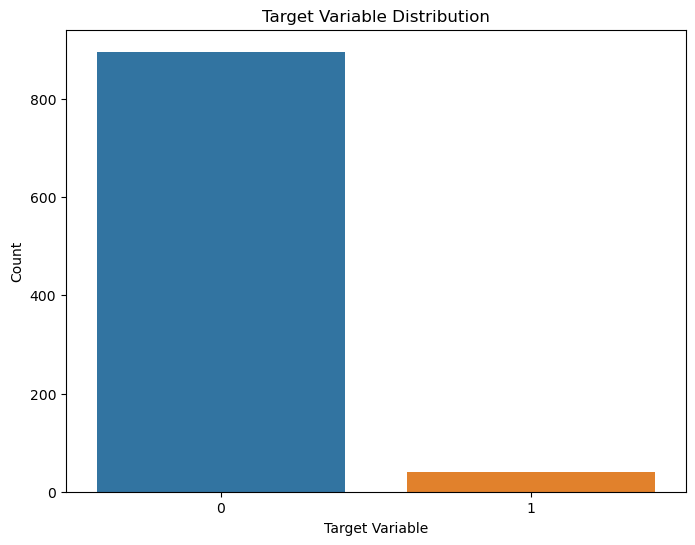

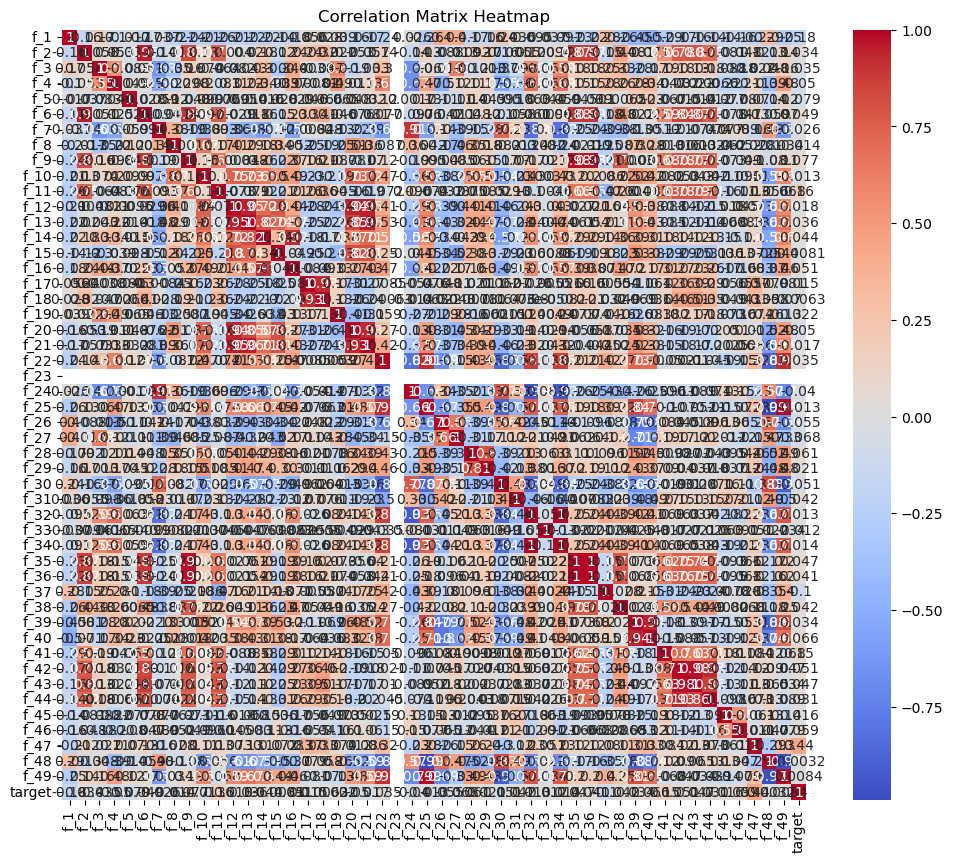

In [ ]:
# Data Visualization and exploring relationship between features

# Countplot of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df)
plt.title("Target Variable Distribution")
plt.xlabel("Target Variable")
plt.ylabel("Count")
plt.show()

# Correlation matrix heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()

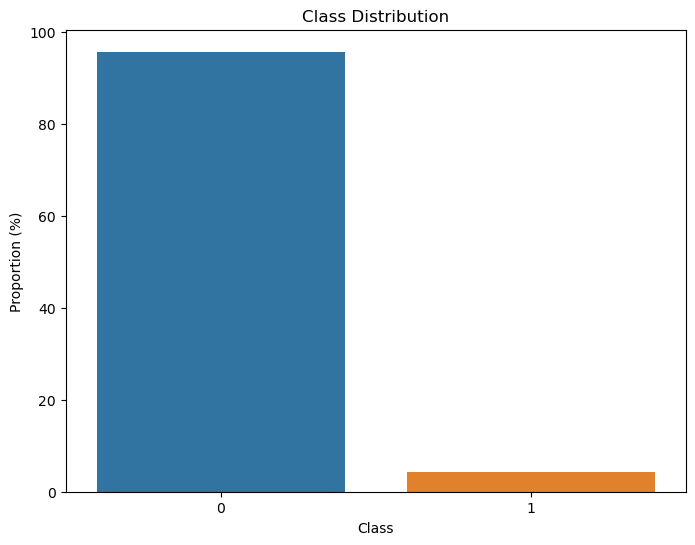

In [14]:
# Checking if the classification is balanced or not?

# Count the occurrences of each class in the target variable
class_counts = df['target'].value_counts()

# Calculate the class proportions
class_proportions = class_counts / len(df) * 100

# Plot the class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_proportions)
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Proportion (%)")
plt.show()

In [15]:
# Now using Undersampling technique from resampling to balance 0 and 1

# Separate the majority and minority class examples
majority_class = df[df['target'] == 0]
minority_class = df[df['target'] == 1]

# Determine the desired number of samples in the majority class
desired_samples = len(minority_class)

# Undersample the majority class
undersampled_majority = majority_class.sample(n=desired_samples, random_state=42)

# Combine the undersampled majority class and the minority class
undersampled_data = pd.concat([undersampled_majority, minority_class])

# Shuffle the undersampled data
undersampled_data = undersampled_data.sample(frac=1, random_state=42)


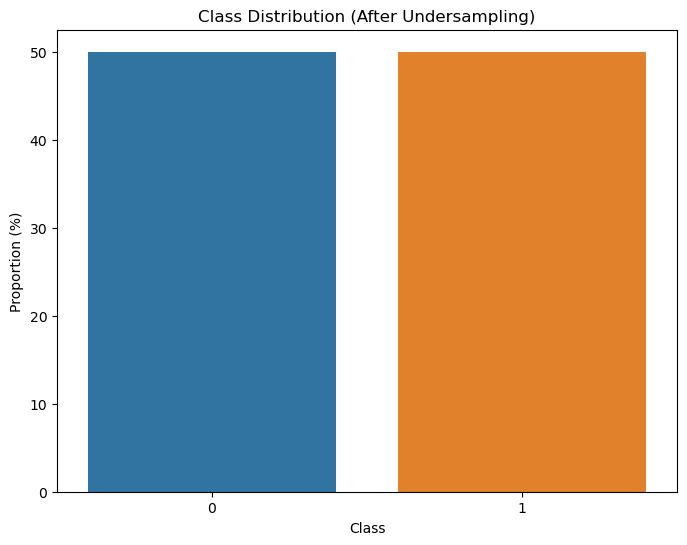

In [16]:
#rechecking if it is balanced

# Count the occurrences of each class in the undersampled data
class_counts = undersampled_data['target'].value_counts()

# Calculate the class proportions
class_proportions = class_counts / len(undersampled_data) * 100

# Plot the class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_proportions)
plt.title("Class Distribution (After Undersampling)")
plt.xlabel("Class")
plt.ylabel("Proportion (%)")
plt.show()

In [18]:
# Separate the features (X) and target variable (Y)
X = undersampled_data.drop('target', axis=1)
Y = undersampled_data['target']

In [19]:
from sklearn.preprocessing import StandardScaler

# Select the numerical columns for feature scaling
numerical_columns = X.select_dtypes(include=np.number).columns

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler on the numerical features and transform them
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

In [20]:
# Select the categorical columns for one-hot encoding
categorical_columns = X.select_dtypes(include='object').columns

# Perform one-hot encoding on the categorical features
X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)


In [21]:
from sklearn.model_selection import train_test_split

# Split the undersampled dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [22]:
# Print the first few rows of the undersampled dataset
print("Undersampled dataset:")
print(undersampled_data.head())

Undersampled dataset:
     f_1  f_2      f_3      f_4  f_5     f_6    f_7    f_8     f_9  f_10  ...  \
612   44   30   151.03   658.57  126  243000  52.40  14.40  1768.0  0.28  ...   
748   16   22    31.23   412.77   62  178200  49.77   8.49  1985.0  0.17  ...   
205   12   86  1244.77   315.95   51  215000  33.17   5.49  3150.0  0.17  ...   
152  143   69  1729.68  1406.67   62  172500  31.57   4.84  1840.0  0.15  ...   
932  200   12    92.42   364.42  135   97200  59.42  10.34   884.0  0.17  ...   

        f_41    f_42    f_43    f_44   f_45  f_46     f_47   f_48  f_49  \
612   649.00  324.50  268.32   77.12   2.42     0  7702.79  66.26  6.28   
748  1049.57  127.28   25.46   53.67  41.23     1  2312.51  65.89  6.15   
205  1460.31  212.13   69.33   77.45  21.06     1  8124.04  65.64  7.71   
152   514.78  250.00  202.47   27.53   2.54     0  4043.78  66.26  7.97   
932   381.84  254.56   84.85  146.97   4.50     0  2593.50  65.85  6.39   

     target  
612       0  
748       0 

In [23]:
# Get the summary statistics of numerical columns

print(undersampled_data.describe())

              f_1          f_2          f_3          f_4         f_5  \
count   82.000000    82.000000    82.000000    82.000000   82.000000   
mean    48.768293   374.085366   707.244024   843.192683   73.219512   
std     53.529108  1160.188450   556.582225   552.784048   43.989063   
min      1.000000    11.000000     7.700000   191.640000    2.000000   
25%      9.250000    50.250000   179.565000   364.737500   42.000000   
50%     27.000000    79.500000   601.135000   632.900000   68.000000   
75%     67.500000   156.250000  1129.555000  1209.592500   96.750000   
max    200.000000  9264.000000  1752.890000  2632.390000  179.000000   

                f_6        f_7        f_8           f_9       f_10  ...  \
count  8.200000e+01  82.000000  82.000000     82.000000  82.000000  ...   
mean   9.691490e+05  41.943049   8.741585   4807.420732   0.214024  ...   
std    2.110193e+06  12.063900   3.605700   6253.133526   0.075422  ...   
min    7.312500e+04  22.790000   3.450000    794.00

In [24]:
# Calculate the correlation matrix

correlation_matrix = undersampled_data.corr()
print(correlation_matrix) 

             f_1       f_2       f_3       f_4       f_5       f_6       f_7  \
f_1     1.000000 -0.227109  0.124909  0.093037  0.135464 -0.313381 -0.019025   
f_2    -0.227109  1.000000  0.127805  0.040353 -0.191896  0.919298 -0.279208   
f_3     0.124909  0.127805  1.000000  0.279708 -0.171494  0.110636 -0.589667   
f_4     0.093037  0.040353  0.279708  1.000000  0.121329 -0.104067 -0.519342   
f_5     0.135464 -0.191896 -0.171494  0.121329  1.000000 -0.207856  0.268747   
f_6    -0.313381  0.919298  0.110636 -0.104067 -0.207856  1.000000 -0.223258   
f_7    -0.019025 -0.279208 -0.589667 -0.519342  0.268747 -0.223258  1.000000   
f_8    -0.186718 -0.072112 -0.295965 -0.400411  0.132263  0.064552  0.477972   
f_9    -0.375359  0.794023  0.198295 -0.152304 -0.166328  0.923392 -0.217205   
f_10   -0.200671  0.180711  0.128562 -0.012349 -0.047044  0.269489 -0.292647   
f_11   -0.321596  0.726119 -0.019615 -0.223230 -0.213010  0.880726 -0.075052   
f_12   -0.130313  0.053586 -0.056279  0.

In [25]:
# Calculate the average value of the target variable

average_target = undersampled_data['target'].mean()
print("Average target value:", average_target)

Average target value: 0.5


In [29]:
# Count the number of rows with target value 1

target_1_count = undersampled_data[undersampled_data['target'] == 1].shape[0]
print("Number of rows with target value 1:", target_1_count)

Number of rows with target value 1: 41


In [30]:
# Calculate the average value of f_1 for rows with target value 1

avg_f1_target_1 = undersampled_data[undersampled_data['target'] == 1]['f_1'].mean()
print("Average f_1 for rows with target value 1:", avg_f1_target_1)

Average f_1 for rows with target value 1: 26.78048780487805


In [31]:
# Group the data by target and calculate the average value of f_2 for each group

avg_f2_by_target = undersampled_data.groupby('target')['f_2'].mean()
print("Average f_2 by target:")
print(avg_f2_by_target)

Average f_2 by target:
target
0    107.268293
1    640.902439
Name: f_2, dtype: float64


In [32]:
# Checking which columns have large values compared to others

# Calculate the range of each column
column_ranges = undersampled_data.max() - undersampled_data.min()

# Calculate the standard deviation of each column
column_std = undersampled_data.std()

# Set a threshold to define "large" values
threshold = 3  # You can adjust this threshold as per your requirements

# Identify columns with large values based on range
large_range_columns = column_ranges[column_ranges > threshold]
print("Columns with large range values:")
print(large_range_columns)

# Identify columns with large values based on standard deviation
large_std_columns = column_std[column_std > threshold]
print("Columns with large standard deviation values:")
print(large_std_columns)

Columns with large range values:
f_1          199.00
f_2         9253.00
f_3         1745.19
f_4         2440.75
f_5          177.00
f_6     12954375.00
f_7           51.48
f_8           15.15
f_9        31607.50
f_11         455.70
f_17         737.29
f_18          80.09
f_22          78.42
f_25        1904.02
f_27          11.82
f_28           4.76
f_29          23.67
f_30           7.11
f_35         459.00
f_36       23580.00
f_38         131.60
f_39          79.00
f_40          47.00
f_41        6041.52
f_42        3059.41
f_43        2043.90
f_44         477.23
f_45          41.23
f_47       52815.95
f_48          30.20
f_49           9.40
dtype: float64
Columns with large standard deviation values:
f_1     5.352911e+01
f_2     1.160188e+03
f_3     5.565822e+02
f_4     5.527840e+02
f_5     4.398906e+01
f_6     2.110193e+06
f_7     1.206390e+01
f_8     3.605700e+00
f_9     6.253134e+03
f_11    7.824657e+01
f_17    1.016115e+02
f_18    1.776251e+01
f_22    2.233452e+01
f_25    6.043

In [33]:
# Calculate the maximum values for each column in the undersampled dataset
max_values = undersampled_data.max()

# Select columns with large values (e.g., greater than a threshold)
large_value_threshold = 100  # Adjust the threshold as needed
columns_with_large_values = max_values[max_values > large_value_threshold].index

# Print the columns with large values
print("Columns with large values:")
print(columns_with_large_values)

Columns with large values:
Index(['f_1', 'f_2', 'f_3', 'f_4', 'f_5', 'f_6', 'f_9', 'f_11', 'f_17', 'f_22',
       'f_25', 'f_35', 'f_36', 'f_38', 'f_39', 'f_41', 'f_42', 'f_43', 'f_44',
       'f_47'],
      dtype='object')


In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
logistic_regression = LogisticRegression()

from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree model
decision_tree = DecisionTreeClassifier()

from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
random_forest = RandomForestClassifier()

from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting model
gradient_boosting = GradientBoostingClassifier()

from sklearn.svm import SVC

# Initialize Support Vector Machines model
svm = SVC()

from sklearn.neural_network import MLPClassifier

# Initialize Multi-layer Perceptron (Neural Network) model
mlp = MLPClassifier()


In [37]:
# Initialize models
logistic_regression = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
svm = SVC()
mlp = MLPClassifier()

# Train the models
logistic_regression.fit(X_train, Y_train)
decision_tree.fit(X_train, Y_train)
random_forest.fit(X_train, Y_train)
svm.fit(X_train, Y_train)
mlp.fit(X_train, Y_train)

c:\Users\Sachin Kamath\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [38]:
# Make predictions on the testing set
logistic_regression_predictions = logistic_regression.predict(X_test)
decision_tree_predictions = decision_tree.predict(X_test)
random_forest_predictions = random_forest.predict(X_test)
svm_predictions = svm.predict(X_test)
mlp_predictions = mlp.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score

# Calculate accuracy for each model
logistic_regression_accuracy = accuracy_score(Y_test, logistic_regression_predictions)
decision_tree_accuracy = accuracy_score(Y_test, decision_tree_predictions)
random_forest_accuracy = accuracy_score(Y_test, random_forest_predictions)
svm_accuracy = accuracy_score(Y_test, svm_predictions)
mlp_accuracy = accuracy_score(Y_test, mlp_predictions)


In [40]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix for each model
logistic_regression_cm = confusion_matrix(Y_test, logistic_regression_predictions)
decision_tree_cm = confusion_matrix(Y_test, decision_tree_predictions)
random_forest_cm = confusion_matrix(Y_test, random_forest_predictions)
svm_cm = confusion_matrix(Y_test, svm_predictions)
mlp_cm = confusion_matrix(Y_test, mlp_predictions)


In [41]:
from sklearn.metrics import classification_report

# Calculate precision, recall, and f1-score for each model
logistic_regression_report = classification_report(Y_test, logistic_regression_predictions)
decision_tree_report = classification_report(Y_test, decision_tree_predictions)
random_forest_report = classification_report(Y_test, random_forest_predictions)
svm_report = classification_report(Y_test, svm_predictions)
mlp_report = classification_report(Y_test, mlp_predictions)


In [42]:
from sklearn.metrics import roc_auc_score

# Calculate ROC AUC for each model
logistic_regression_roc_auc = roc_auc_score(Y_test, logistic_regression_predictions)
decision_tree_roc_auc = roc_auc_score(Y_test, decision_tree_predictions)
random_forest_roc_auc = roc_auc_score(Y_test, random_forest_predictions)
svm_roc_auc = roc_auc_score(Y_test, svm_predictions)
mlp_roc_auc = roc_auc_score(Y_test, mlp_predictions)


In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Evaluate and print the performance of individual models
models = {
    'Logistic Regression': logistic_regression,
    'Decision Tree': decision_tree,
    'Random Forest': random_forest,
    'SVM': svm,
    'MLP': mlp
}

for model_name, model in models.items():
    # Make predictions on the testing set
    predictions = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(Y_test, predictions)
    cm = confusion_matrix(Y_test, predictions)
    report = classification_report(Y_test, predictions)
    roc_auc = roc_auc_score(Y_test, predictions)

    # Print the evaluation results for each model
    print("Model:", model_name)
    print("Accuracy:", accuracy)
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", report)
    print("ROC AUC:", roc_auc)
    print("-----------------------------------\n")


Model: Logistic Regression
Accuracy: 0.7058823529411765
Confusion Matrix:
 [[6 2]
 [3 6]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.75      0.71         8
           1       0.75      0.67      0.71         9

    accuracy                           0.71        17
   macro avg       0.71      0.71      0.71        17
weighted avg       0.71      0.71      0.71        17

ROC AUC: 0.7083333333333334
-----------------------------------

Model: Decision Tree
Accuracy: 0.7647058823529411
Confusion Matrix:
 [[8 0]
 [4 5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         8
           1       1.00      0.56      0.71         9

    accuracy                           0.76        17
   macro avg       0.83      0.78      0.76        17
weighted avg       0.84      0.76      0.75        17

ROC AUC: 0.7777777777777778
-------------------------------

In [44]:
from sklearn.ensemble import BaggingClassifier

# Initialize the base classifier
base_classifier = DecisionTreeClassifier()

# Initialize the BaggingClassifier
bagging_model = BaggingClassifier(base_classifier, n_estimators=10, random_state=42)

# Train the BaggingClassifier
bagging_model.fit(X_train, Y_train)

# Make predictions on the testing set
bagging_predictions = bagging_model.predict(X_test)

# Evaluate the BaggingClassifier
bagging_accuracy = accuracy_score(Y_test, bagging_predictions)
bagging_cm = confusion_matrix(Y_test, bagging_predictions)
bagging_report = classification_report(Y_test, bagging_predictions)
bagging_roc_auc = roc_auc_score(Y_test, bagging_predictions)

# Print the evaluation results for the BaggingClassifier
print("Bagging Ensemble Model")
print("Accuracy:", bagging_accuracy)
print("Confusion Matrix:\n", bagging_cm)
print("Classification Report:\n", bagging_report)
print("ROC AUC:", bagging_roc_auc)


Bagging Ensemble Model
Accuracy: 0.8823529411764706
Confusion Matrix:
 [[8 0]
 [2 7]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       1.00      0.78      0.88         9

    accuracy                           0.88        17
   macro avg       0.90      0.89      0.88        17
weighted avg       0.91      0.88      0.88        17

ROC AUC: 0.8888888888888888


In [45]:
from sklearn.ensemble import VotingClassifier

# Initialize individual classifiers
classifiers = [
    ('Logistic Regression', logistic_regression),
    ('Decision Tree', decision_tree),
    ('Random Forest', random_forest),
    ('SVM', svm),
    ('MLP', mlp)
]

# Initialize the VotingClassifier
voting_model = VotingClassifier(classifiers)

# Train the VotingClassifier
voting_model.fit(X_train, Y_train)

# Make predictions on the testing set
voting_predictions = voting_model.predict(X_test)

# Evaluate the VotingClassifier
voting_accuracy = accuracy_score(Y_test, voting_predictions)
voting_cm = confusion_matrix(Y_test, voting_predictions)
voting_report = classification_report(Y_test, voting_predictions)
voting_roc_auc = roc_auc_score(Y_test, voting_predictions)

# Print the evaluation results for the VotingClassifier
print("Voting Ensemble Model")
print("Accuracy:", voting_accuracy)
print("Confusion Matrix:\n", voting_cm)
print("Classification Report:\n", voting_report)
print("ROC AUC:", voting_roc_auc)


Voting Ensemble Model
Accuracy: 0.7647058823529411
Confusion Matrix:
 [[8 0]
 [4 5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         8
           1       1.00      0.56      0.71         9

    accuracy                           0.76        17
   macro avg       0.83      0.78      0.76        17
weighted avg       0.84      0.76      0.75        17

ROC AUC: 0.7777777777777778


c:\Users\Sachin Kamath\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [46]:
# Dictionary to store model accuracies
model_accuracies = {
    'Logistic Regression': logistic_regression_accuracy,
    'Decision Tree': decision_tree_accuracy,
    'Random Forest': random_forest_accuracy,
    'SVM': svm_accuracy,
    'MLP': mlp_accuracy,
    'Bagging Ensemble': bagging_accuracy,
    'Voting Ensemble': voting_accuracy
}

# Find the model with the highest accuracy
best_model = max(model_accuracies, key=model_accuracies.get)
best_accuracy = model_accuracies[best_model]

# Print the best model and its accuracy
print("Best Model:", best_model)
print("Best Accuracy:", best_accuracy)


Best Model: Bagging Ensemble
Best Accuracy: 0.8823529411764706


In [47]:
from joblib import dump

# Save the best model to a file
dump(bagging_model, 'best_model.joblib')

['best_model.joblib']

In [48]:
from joblib import load

# Load the best model from a file
loaded_model = load('best_model.joblib')

In [49]:
print(loaded_model)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=42)


In [50]:
#Import the necessary libraries and modules

import pandas as pd
import random

In [52]:
undersampled_data.to_csv('undersampled_dataset.csv', index=False)

In [58]:
import pandas as pd

# Load the undersampled dataset
undersampled_data = pd.read_csv('undersampled_dataset.csv')

# Randomly select 20 data points from the undersampled dataset
new_data = undersampled_data.sample(n=20, random_state=42)

# Apply the saved model to make predictions on the new dataset
new_X = new_data.drop('target', axis=1)  # Assuming 'target_variable' is the column name for the target variable
new_predictions = loaded_model.predict(new_X)

# Print the predictions for the new dataset
print("Predictions for the new dataset:")
print(new_predictions)


Predictions for the new dataset:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [19]:
# Save the randomly generated dataset to a CSV file
new_data.to_csv('random_dataset.csv', index=False)

NameError: name 'new_data' is not defined

In [18]:
#Based on the dataset provided, here are some insights:

#The target variable is labeled as "target" in the dataset.
#The dataset has information for multiple instances, as indicated by the row numbers.
#The features have varying numerical values, such as integers and floating-point numbers.
#Some features, like f_6 have very large values compared to others.
#The target variable is represented as binary values (0 or 1), suggesting a classification problem.
#There could be missing values in the dataset, as some feature values appear as "NaN."
#'f_1', 'f_2', 'f_3', 'f_4', 'f_5', 'f_6', 'f_9', 'f_11', 'f_17', 'f_22','f_25', #'f_35', 'f_36', 'f_38', 'f_39', 'f_41', 'f_42', 'f_43', 'f_44','f_47'
#The above mentioned coloumns have large values compared to the othe columns 